In [1]:
from fastai.vision import *

In [2]:
!pip install fastai


In [2]:
import numpy as np
np.random.seed(3)

In [4]:

!pip install kaggle

In [3]:
from glob import glob

In [5]:
path = Path("")
labels = pd.read_csv("/Users/BOLD I.T/content/derm/HAM10000_metadata.csv", sep=',')
labels.head()

#imageid = {os.path.splitext(os.path.basename(x))[0]: x
                     #for x in glob(os.path.join(path, '*', '*.jpg'))}

labels['path'] = labels['image_id'] +".jpg"
#labels['path'] = labels['path'].str[9:]
labels.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
5080,HAM_0004175,ISIC_0028806,nv,follow_up,50.0,female,abdomen,ISIC_0028806.jpg
564,HAM_0006595,ISIC_0028223,bkl,histo,55.0,female,face,ISIC_0028223.jpg
7369,HAM_0005248,ISIC_0032948,nv,histo,45.0,female,upper extremity,ISIC_0032948.jpg
5150,HAM_0001592,ISIC_0030686,nv,follow_up,55.0,male,back,ISIC_0030686.jpg
9790,HAM_0004609,ISIC_0024710,akiec,histo,75.0,male,back,ISIC_0024710.jpg


In [6]:
path = ""

In [7]:
tfms=get_transforms(do_flip=True, flip_vert=True)

In [9]:
data = ImageDataBunch.from_df(path='/Users/BOLD I.T/content/derm', df=labels,
                              ds_tfms=tfms, size=112,bs=16,
                               valid_pct=0.2, fn_col='path', 
                              label_col='dx'
                              ).normalize(imagenet_stats)

In [10]:
data.label_list

LabelLists;

Train: LabelList (8012 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
bkl,bkl,bkl,bkl,bkl
Path: \Users\BOLD I.T\content\derm;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
nv,nv,nv,nv,nv
Path: \Users\BOLD I.T\content\derm;

Test: None

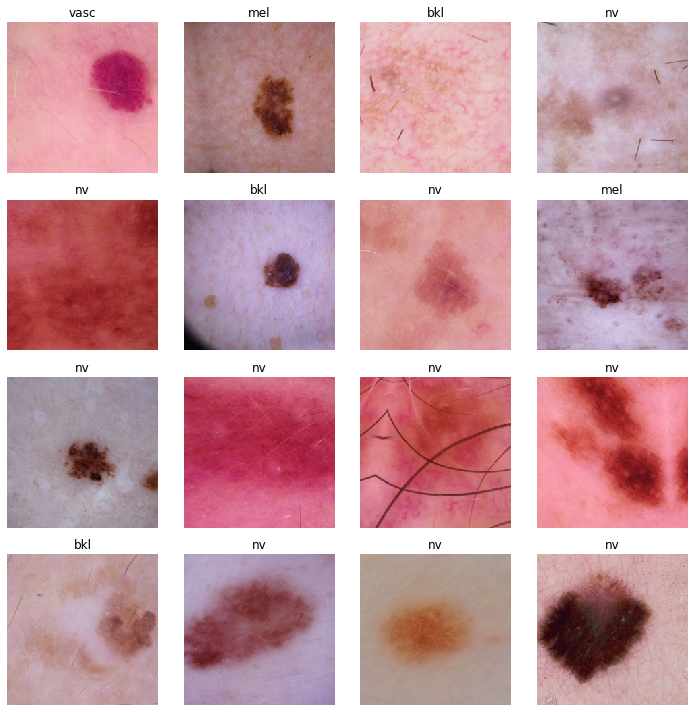

In [28]:
data.show_batch(rows=5, figsize=(10,10))

In [11]:
arch = models.mobilenet_v2

In [12]:
learn = cnn_learner(data, arch, metrics= accuracy, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


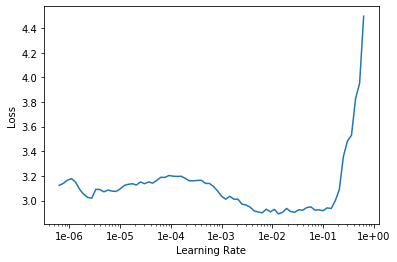

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(31,slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [32]:
learn.save("Derm_stage1")

In [35]:
#Accuracy based on validation set
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))
print(f1_score(y, preds, average="macro"))
print(precision_score(y, preds, average="macro"))
print(recall_score(y, preds, average="macro"))

The accuracy is 12.331502914428711 % .


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [14]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


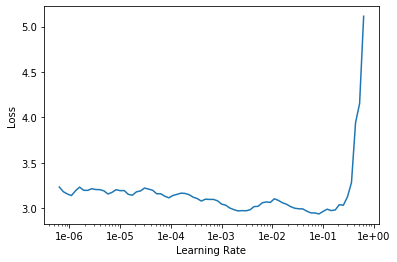

In [15]:

learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.159503,0.828975,0.747878,3:41:50
1,0.828468,0.631864,0.779830,3:34:42
2,0.743440,0.563266,0.796805,3:34:24
3,0.629149,0.544215,0.793310,3:35:04
4,0.606250,0.540874,0.795307,3:49:56


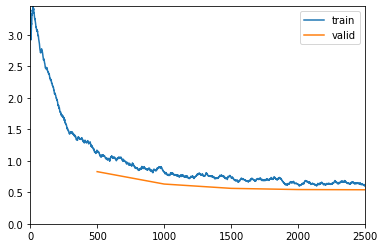

In [16]:
learn.fit_one_cycle(5, slice(5e-6,5e-4), pct_start=0.05)

In [17]:

learn.save("Derm_stage2")

In [19]:
data = ImageDataBunch.from_df(path='/Users/BOLD I.T/content/derm', df=labels,
                              ds_tfms=tfms, size=224,bs=16,
                               valid_pct=0.2, fn_col='path', 
                              label_col='dx'
                              ).normalize(imagenet_stats)

In [20]:
learn.data = data

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


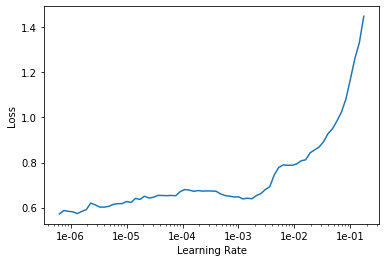

In [21]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,slice(1e-04))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save("Derm_stage3")

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5,1e-4), pct_start=0.05)

In [ ]:
learn.save("Derm_stage4")

In [ ]:
#Accuracy based on validation set
preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))
print(f1_score(y, preds, average="macro"))
print(precision_score(y, preds, average="macro"))
print(recall_score(y, preds, average="macro"))

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
#losses, idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)

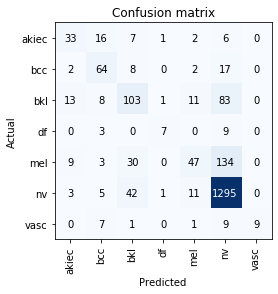

In [24]:
interp.plot_confusion_matrix()

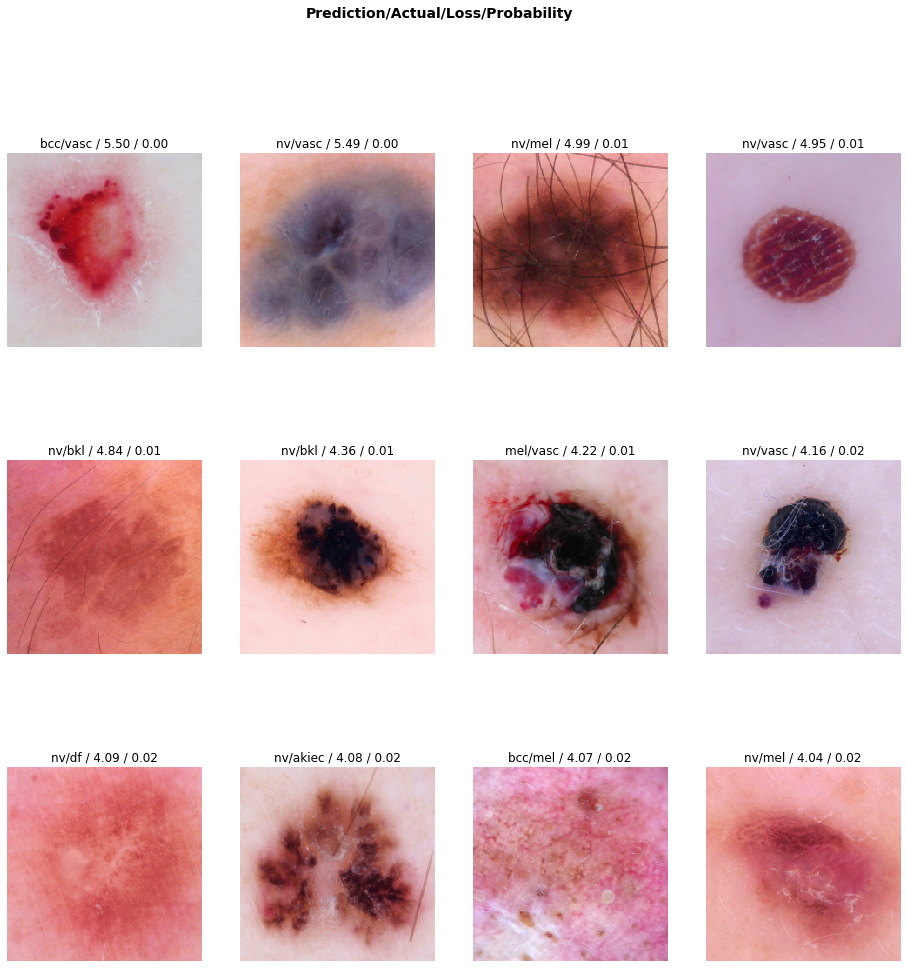

In [25]:
interp.plot_top_losses(12, figsize=(16,16), heatmap = False)

In [26]:
interp.most_confused()

[('mel', 'nv', 134),
 ('bkl', 'nv', 83),
 ('nv', 'bkl', 42),
 ('mel', 'bkl', 30),
 ('bcc', 'nv', 17),
 ('akiec', 'bcc', 16),
 ('bkl', 'akiec', 13),
 ('bkl', 'mel', 11),
 ('nv', 'mel', 11),
 ('df', 'nv', 9),
 ('mel', 'akiec', 9),
 ('vasc', 'nv', 9),
 ('bcc', 'bkl', 8),
 ('bkl', 'bcc', 8),
 ('akiec', 'bkl', 7),
 ('vasc', 'bcc', 7),
 ('akiec', 'nv', 6),
 ('nv', 'bcc', 5),
 ('df', 'bcc', 3),
 ('mel', 'bcc', 3),
 ('nv', 'akiec', 3),
 ('akiec', 'mel', 2),
 ('bcc', 'akiec', 2),
 ('bcc', 'mel', 2),
 ('akiec', 'df', 1),
 ('bkl', 'df', 1),
 ('nv', 'df', 1),
 ('vasc', 'bkl', 1),
 ('vasc', 'mel', 1)]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
X, y = make_classification(n_samples=100, n_informative=10, n_classes=3)
sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)
for train_idx, test_idx in sss:
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro"))  